In [6]:
import os
import sys
import argparse
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
sys.path.append("../../simulator/carla/PythonAPI/carla/dist/carla-0.9.6-py3.5-linux-x86_64.egg")

In [9]:
import carla

In [10]:
client = carla.Client('localhost', 2000)
client.set_timeout(2.0)

In [11]:
world = client.get_world()

In [60]:
weather = world.get_weather()
weather.cloudyness = 0
weather.precipitation = 0
weather.precipitation_deposits = 0
weather.wind_intensity = 0
weather.sun_azimuth_angle = 30
weather.sun_altitude_angle = 100
world.set_weather(weather)

In [61]:
blueprint_library = world.get_blueprint_library()

In [14]:
spawn_points = world.get_map().get_spawn_points()

In [15]:
x, y, z = list(), list(), list()
indexes = list()
total_spawn_points = len(spawn_points)
for idx, point in enumerate(spawn_points):
    if point.location.x > 0:
        continue
    indexes.append(idx)
    x.append(point.location.x)
    y.append(point.location.y)
    z.append(point.location.z)
x = np.array(x).reshape((-1, 1))
y = np.array(y).reshape((-1, 1))
z = np.array(z).reshape((-1, 1))
indexes = np.array(indexes).reshape((-1, 1))

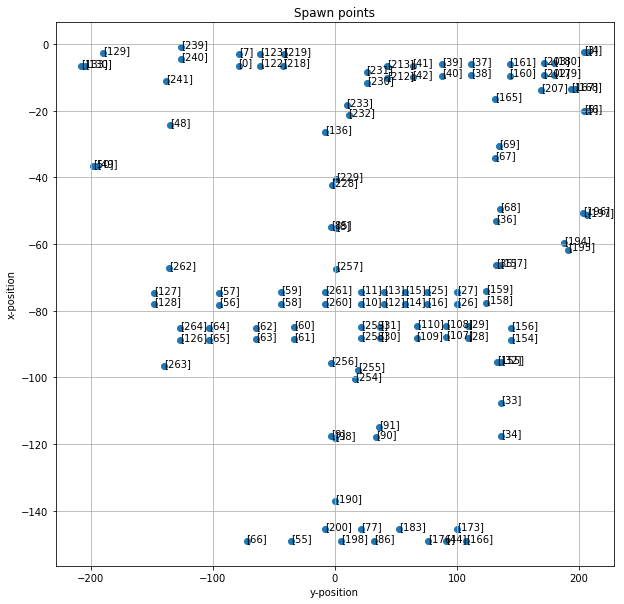

In [16]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.scatter(y, x)
plt.title('Spawn points')
plt.xlabel('y-position')
plt.ylabel('x-position')
plt.grid(True)

for i in range(x.shape[0]):
    ax.annotate(str(indexes[i]), (y[i], x[i]))

plt.show()

In [17]:
selected_points = [162, 163]
for idx in selected_points:
    print(spawn_points[idx])

Transform(Location(x=1.930856, y=122.298492, z=1.843102), Rotation(pitch=0.000000, yaw=-90.362541, roll=0.000000))
Transform(Location(x=5.430785, y=122.276344, z=1.843102), Rotation(pitch=0.000000, yaw=-90.362541, roll=0.000000))


In [64]:
bp = random.choice(blueprint_library.filter('vehicle.tesla.*'))
transform = carla.Transform(carla.Location(x=-88.5, y=-160, z=0.843102), carla.Rotation(pitch=0.000000, yaw=90.0, roll=0.000000))
ego_vehicle = world.spawn_actor(bp, transform)

In [65]:
location = ego_vehicle.get_location()
location.z += 0
ego_vehicle.set_location(location)

In [66]:
ego_vehicle.apply_control(carla.VehicleControl(throttle=5.0, steer=0.0))

In [71]:
# ego_vehicle.destroy()
bp = random.choice(blueprint_library.filter('vehicle.tesla.*'))
transform = carla.Transform(carla.Location(x=-88.5, y=-160, z=0.843102), carla.Rotation(pitch=0.000000, yaw=90.0, roll=0.000000))
ego_vehicle = world.spawn_actor(bp, transform)
ego_vehicle.set_velocity(carla.Vector3D(0.0, 9.3, 0))

In [72]:
ego_vehicle.set_velocity(carla.Vector3D(0.0, 0.0, 0))

In [73]:
n_output = len([d for d in os.listdir("../../dataset") if d.startswith('out')])

In [23]:
n_output

1